In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import math


from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## EDA

In [5]:
df.shape

(1460, 81)

In [6]:
df.drop(['PoolQC','MiscFeature','Fence','Alley','FireplaceQu'], axis=1,inplace=True) 

# Dropping columns with Maximum NAN values

In [7]:
df.drop(['Id'], axis=1,inplace=True) 
#Dropping ID column as it is only the id columns

In [8]:
#Columns with missing values
col=['LotFrontage','MasVnrArea','GarageYrBlt']
for i in col:
    df[i] = df[i].fillna(df[i].mean()) 

In [9]:
col1=['MasVnrType','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond']
df['MasVnrType'] = df['MasVnrType'].fillna("None")
df['BsmtQual'] = df['BsmtQual'].fillna("TA")
df['BsmtCond'] = df['BsmtCond'].fillna("TA")
df['BsmtFinType1'] = df['BsmtFinType1'].fillna("Unf")
df['BsmtFinType2'] = df['BsmtFinType2'].fillna("Unf")
df['GarageType'] = df['GarageType'].fillna("Attchd")
df['GarageFinish'] = df['GarageFinish'].fillna("Unf")
df['GarageQual'] = df['GarageQual'].fillna("TA")
df['GarageCond'] = df['GarageCond'].fillna("TA")
df['Electrical']=df['Electrical'].fillna("SBrkr")
df['BsmtExposure']=df['BsmtExposure'].fillna('No')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape #seems no redundunct data

(1460, 75)

### Outliers Check

In [13]:
df.describe().columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

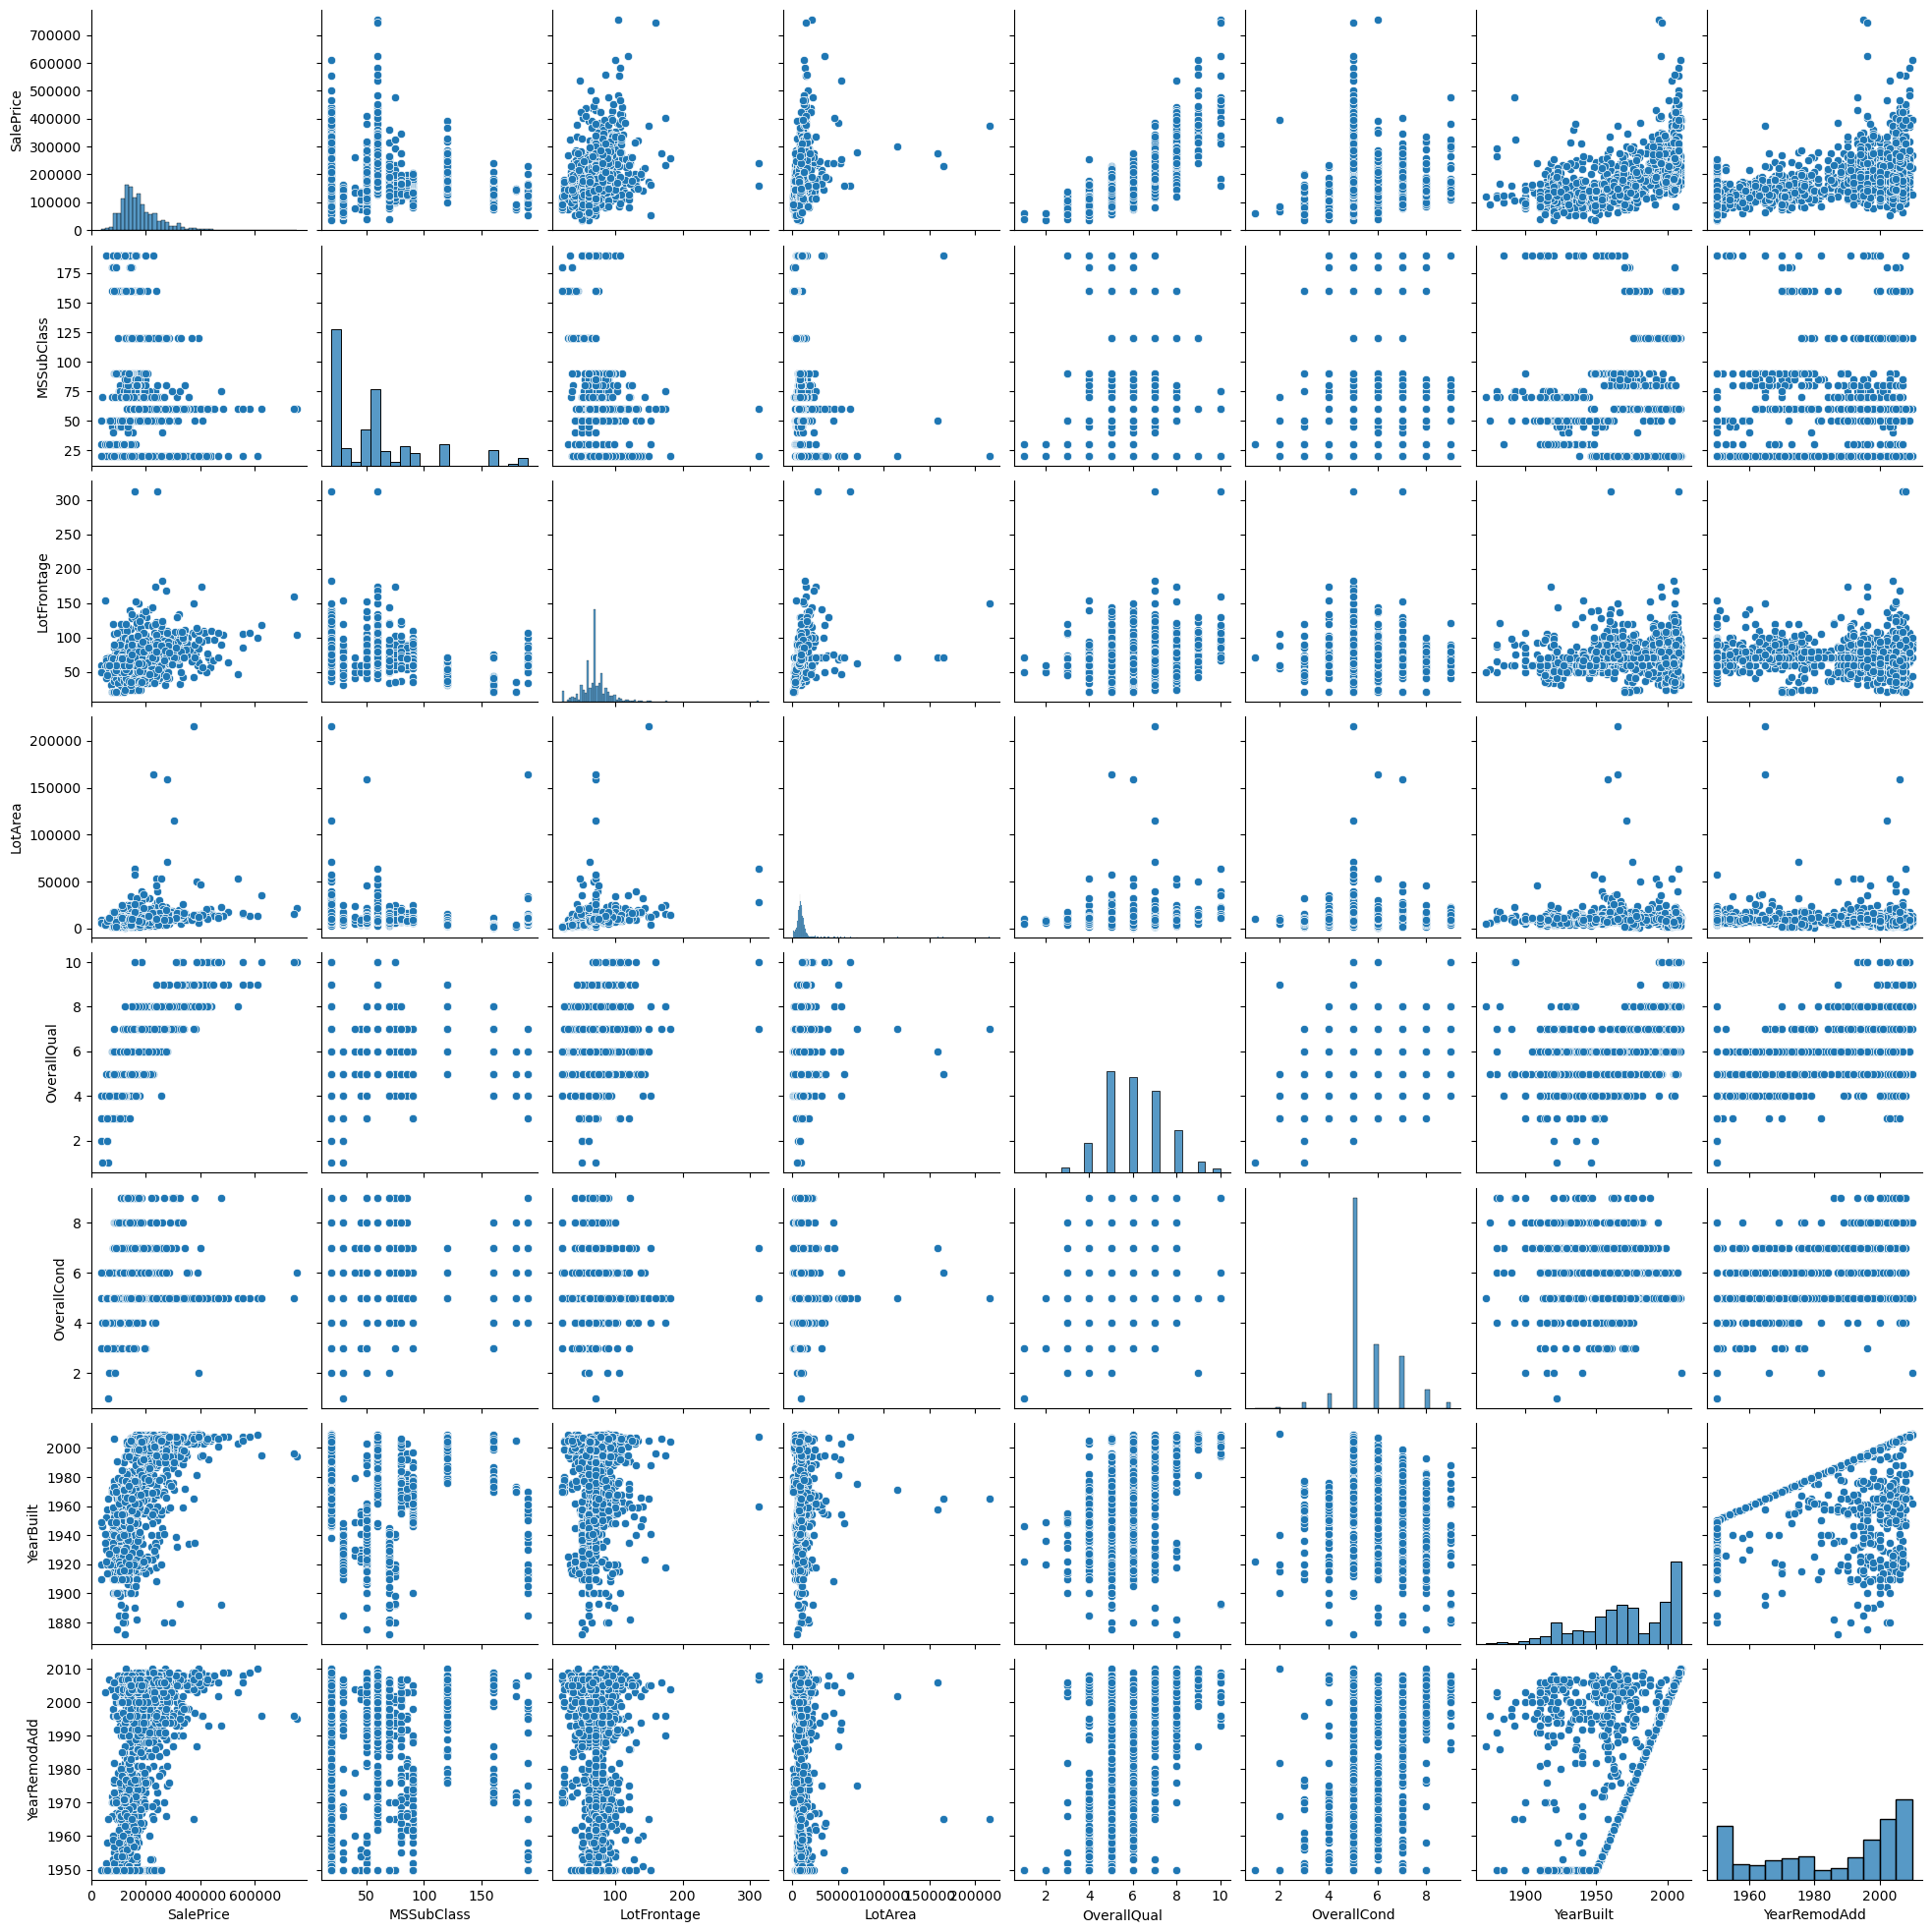

In [14]:
#Getting Numerical columns

num_var=['SalePrice','MSSubClass','LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd']
df_num=df[num_var]
sns.pairplot(df_num)
plt.show()

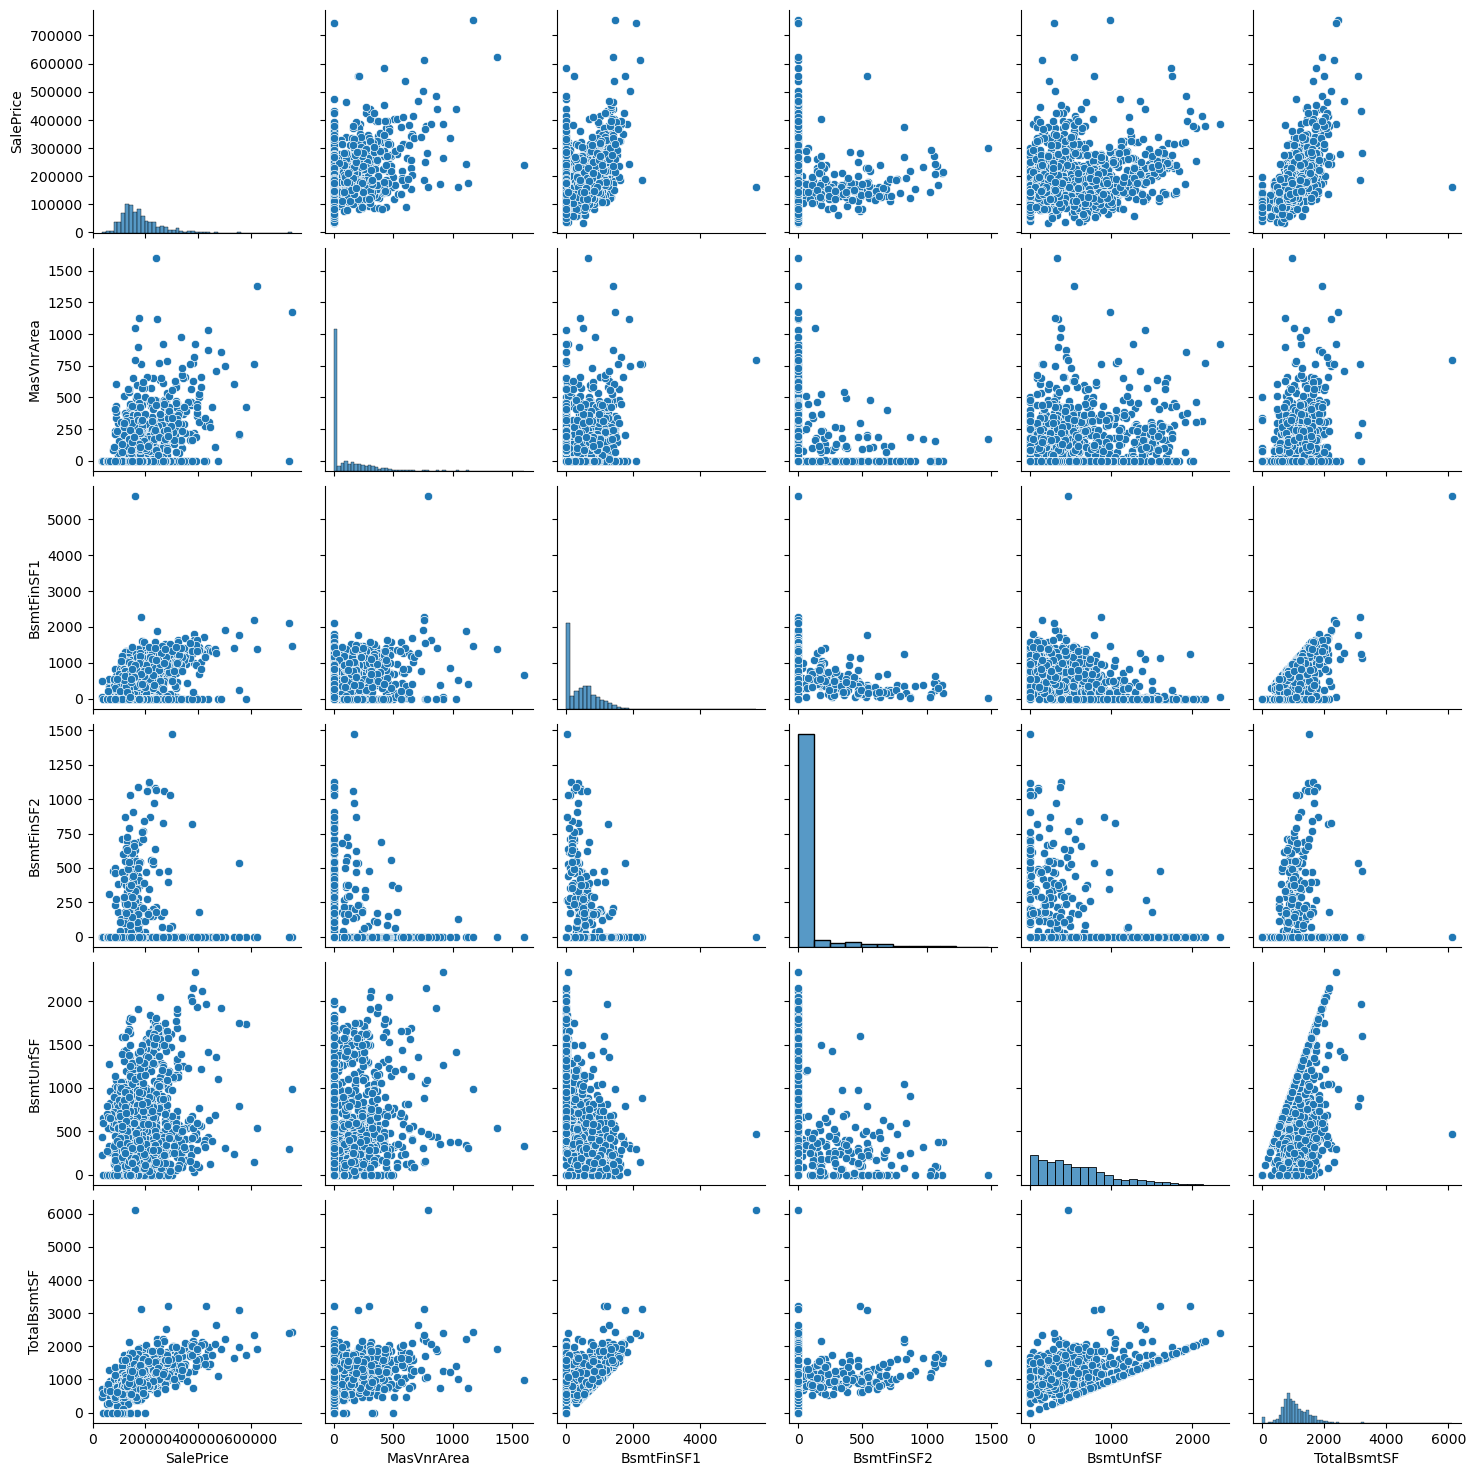

In [15]:
num_var1=['SalePrice', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF']
        
df_num=df[num_var1]
sns.pairplot(df_num)
plt.show()

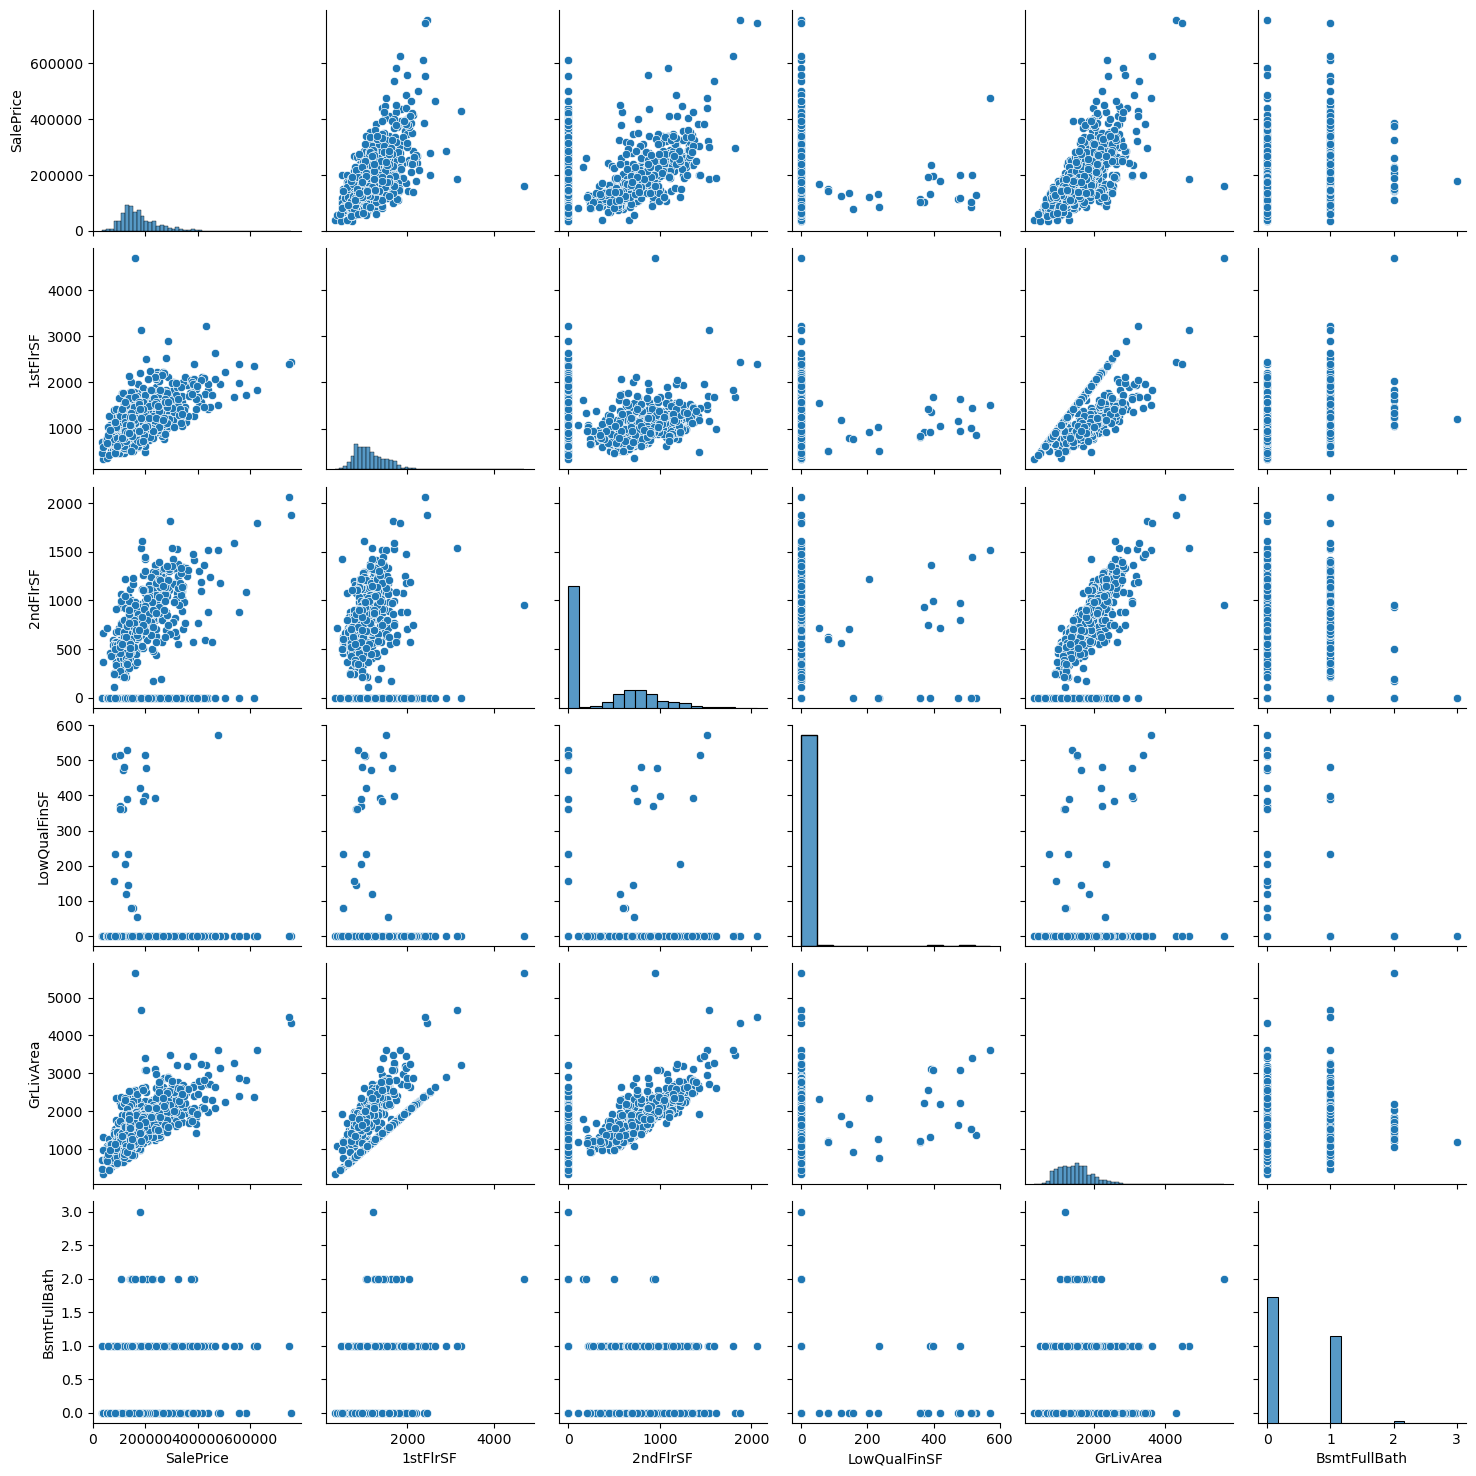

In [16]:
num_var1=['SalePrice', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath']
        
df_num=df[num_var1]
sns.pairplot(df_num)
plt.show()

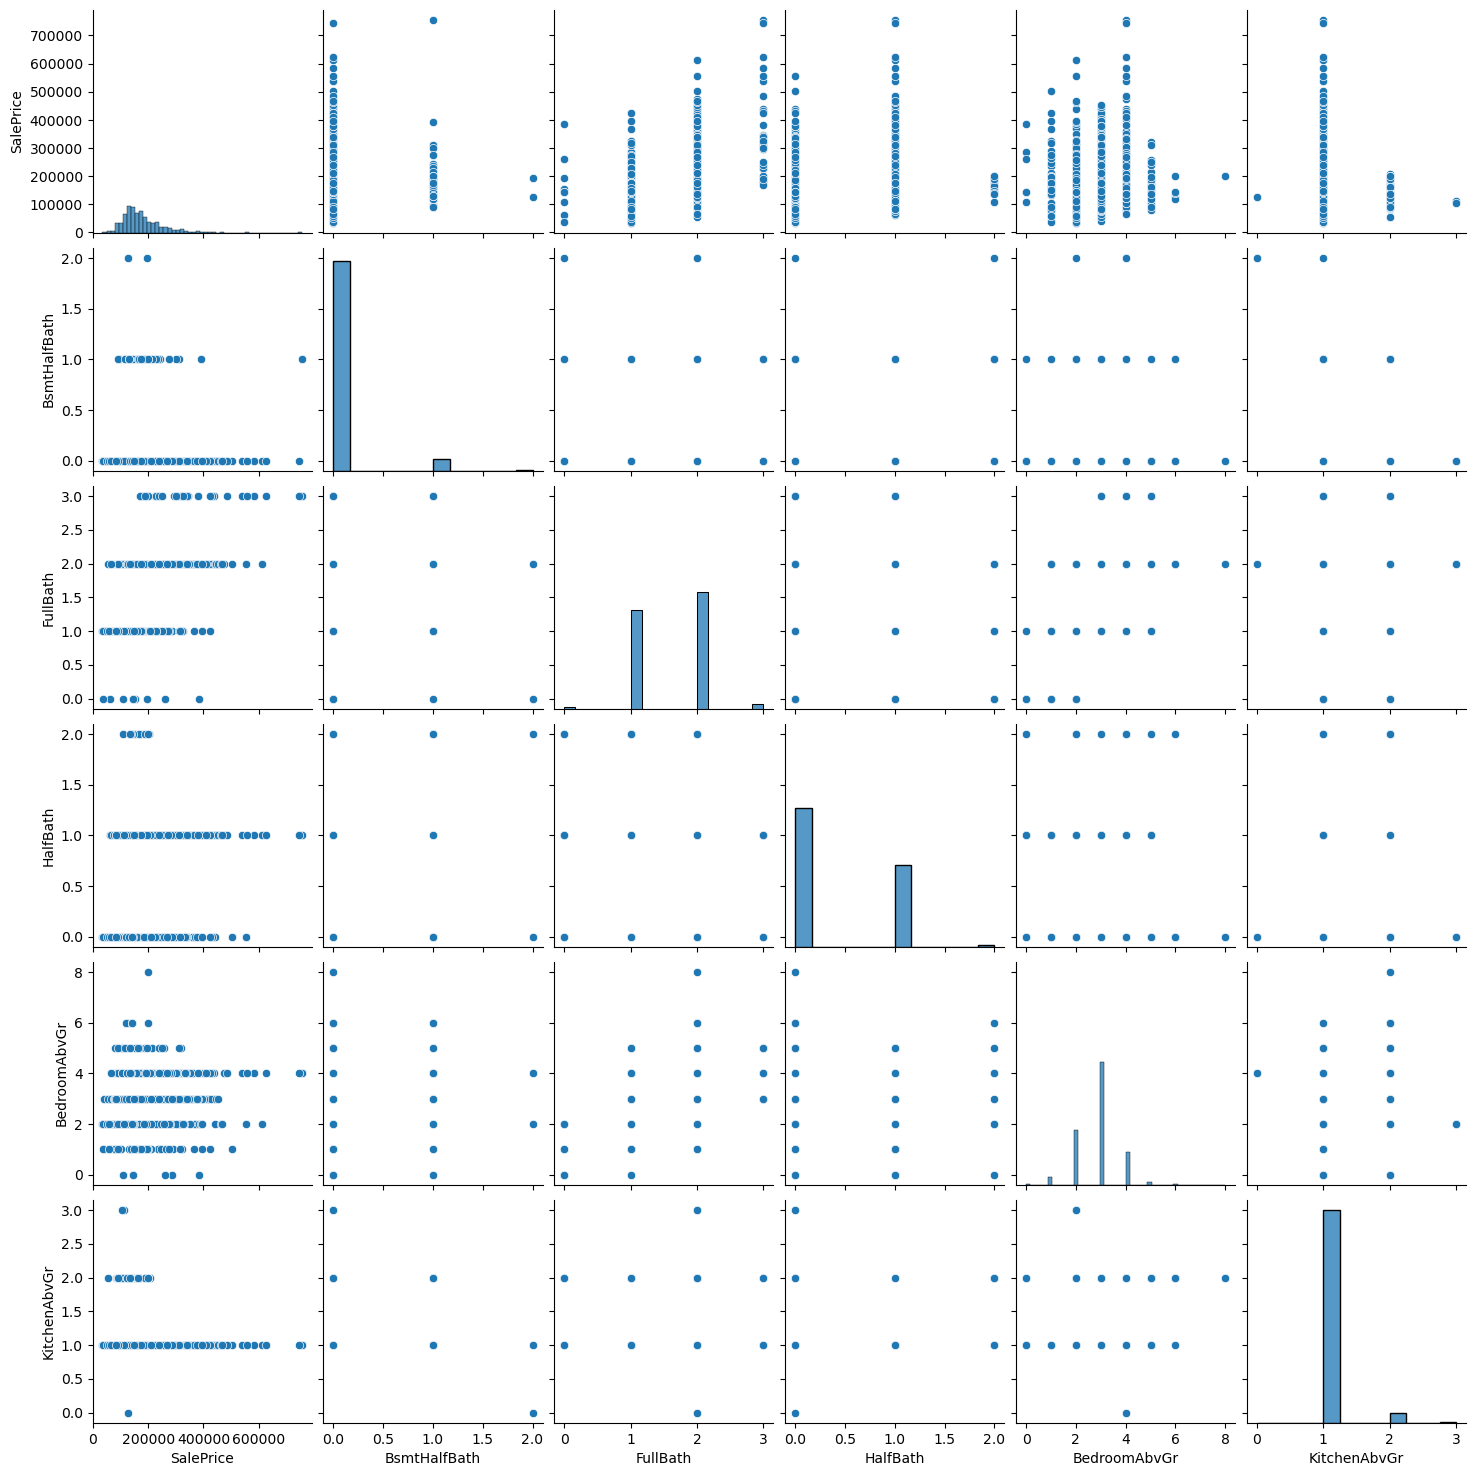

In [17]:
num_var1=['SalePrice','BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr']
        
df_num=df[num_var1]
sns.pairplot(df_num)
plt.show()

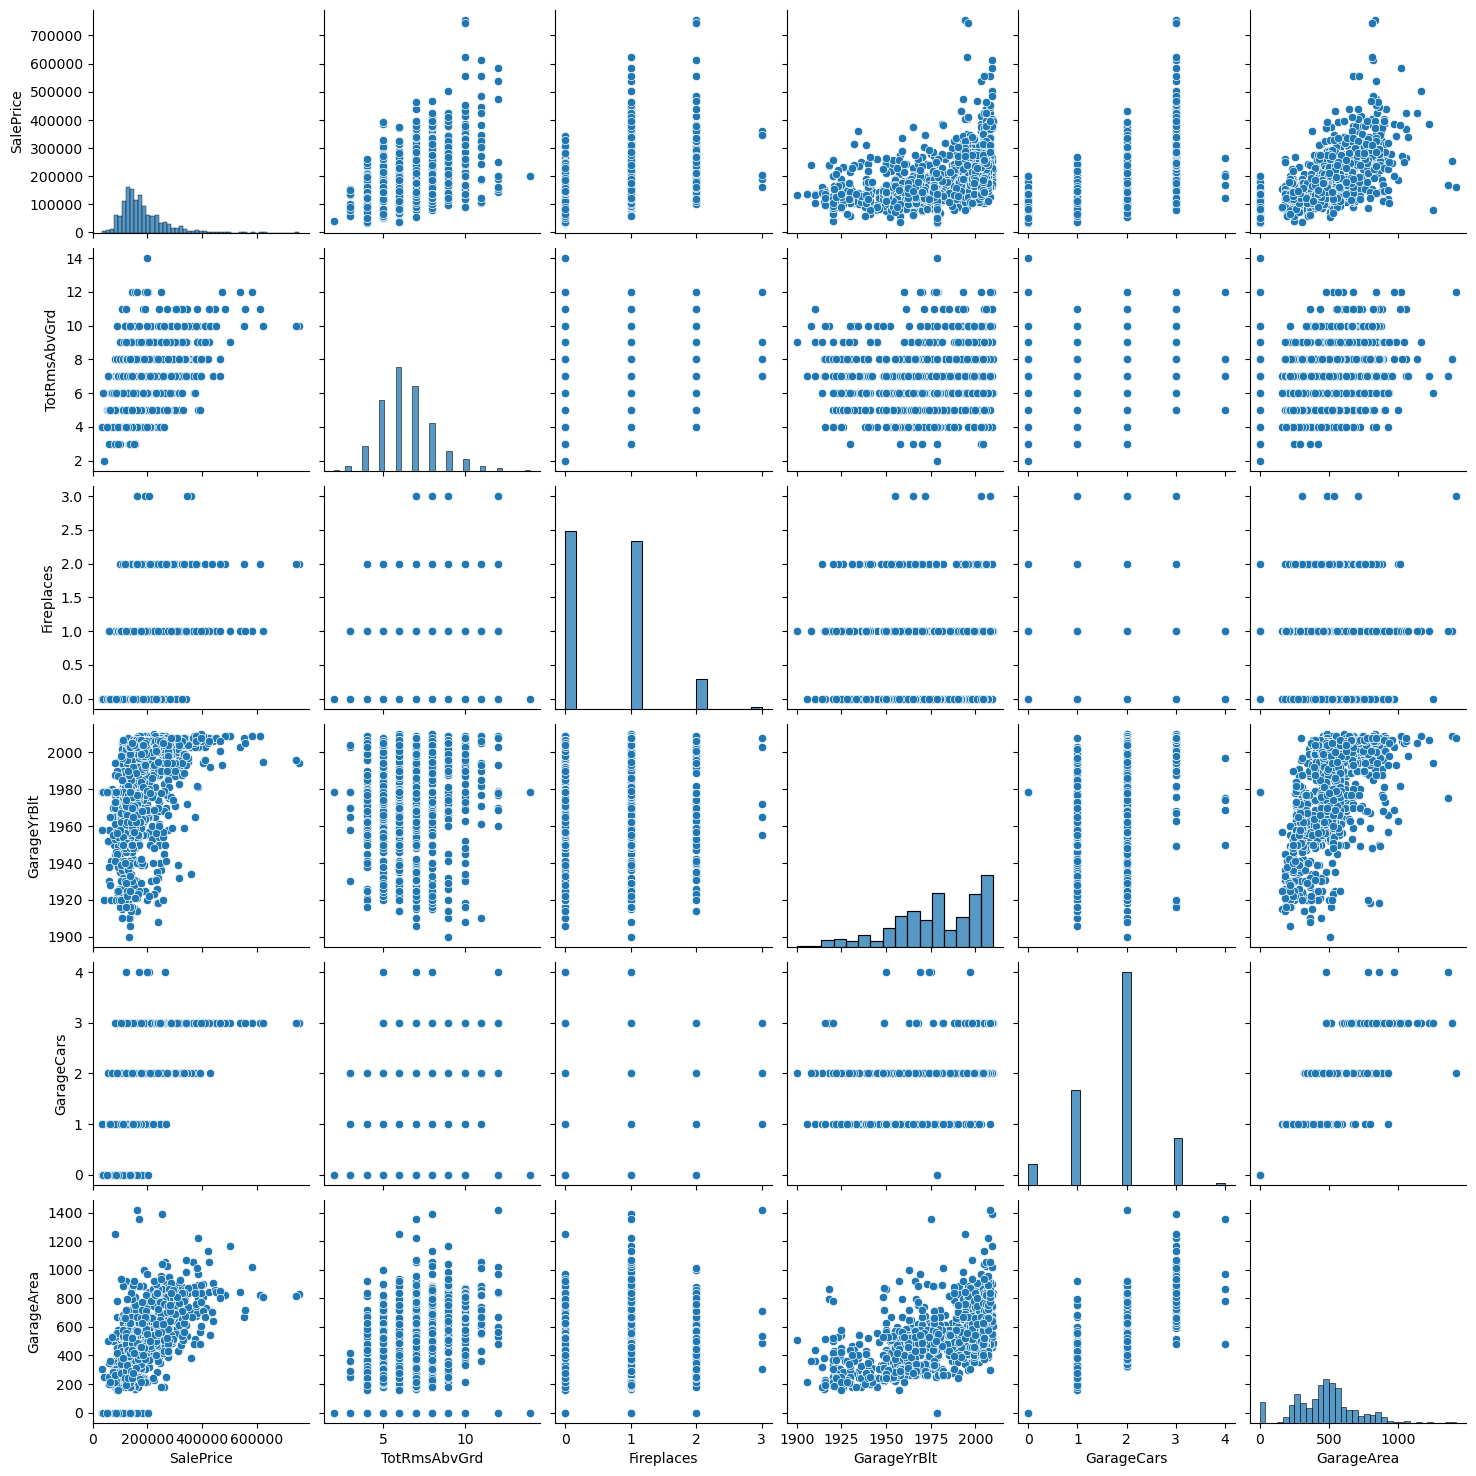

In [18]:
num_var1=['SalePrice','TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea']
        
df_num=df[num_var1]
sns.pairplot(df_num)
plt.show()

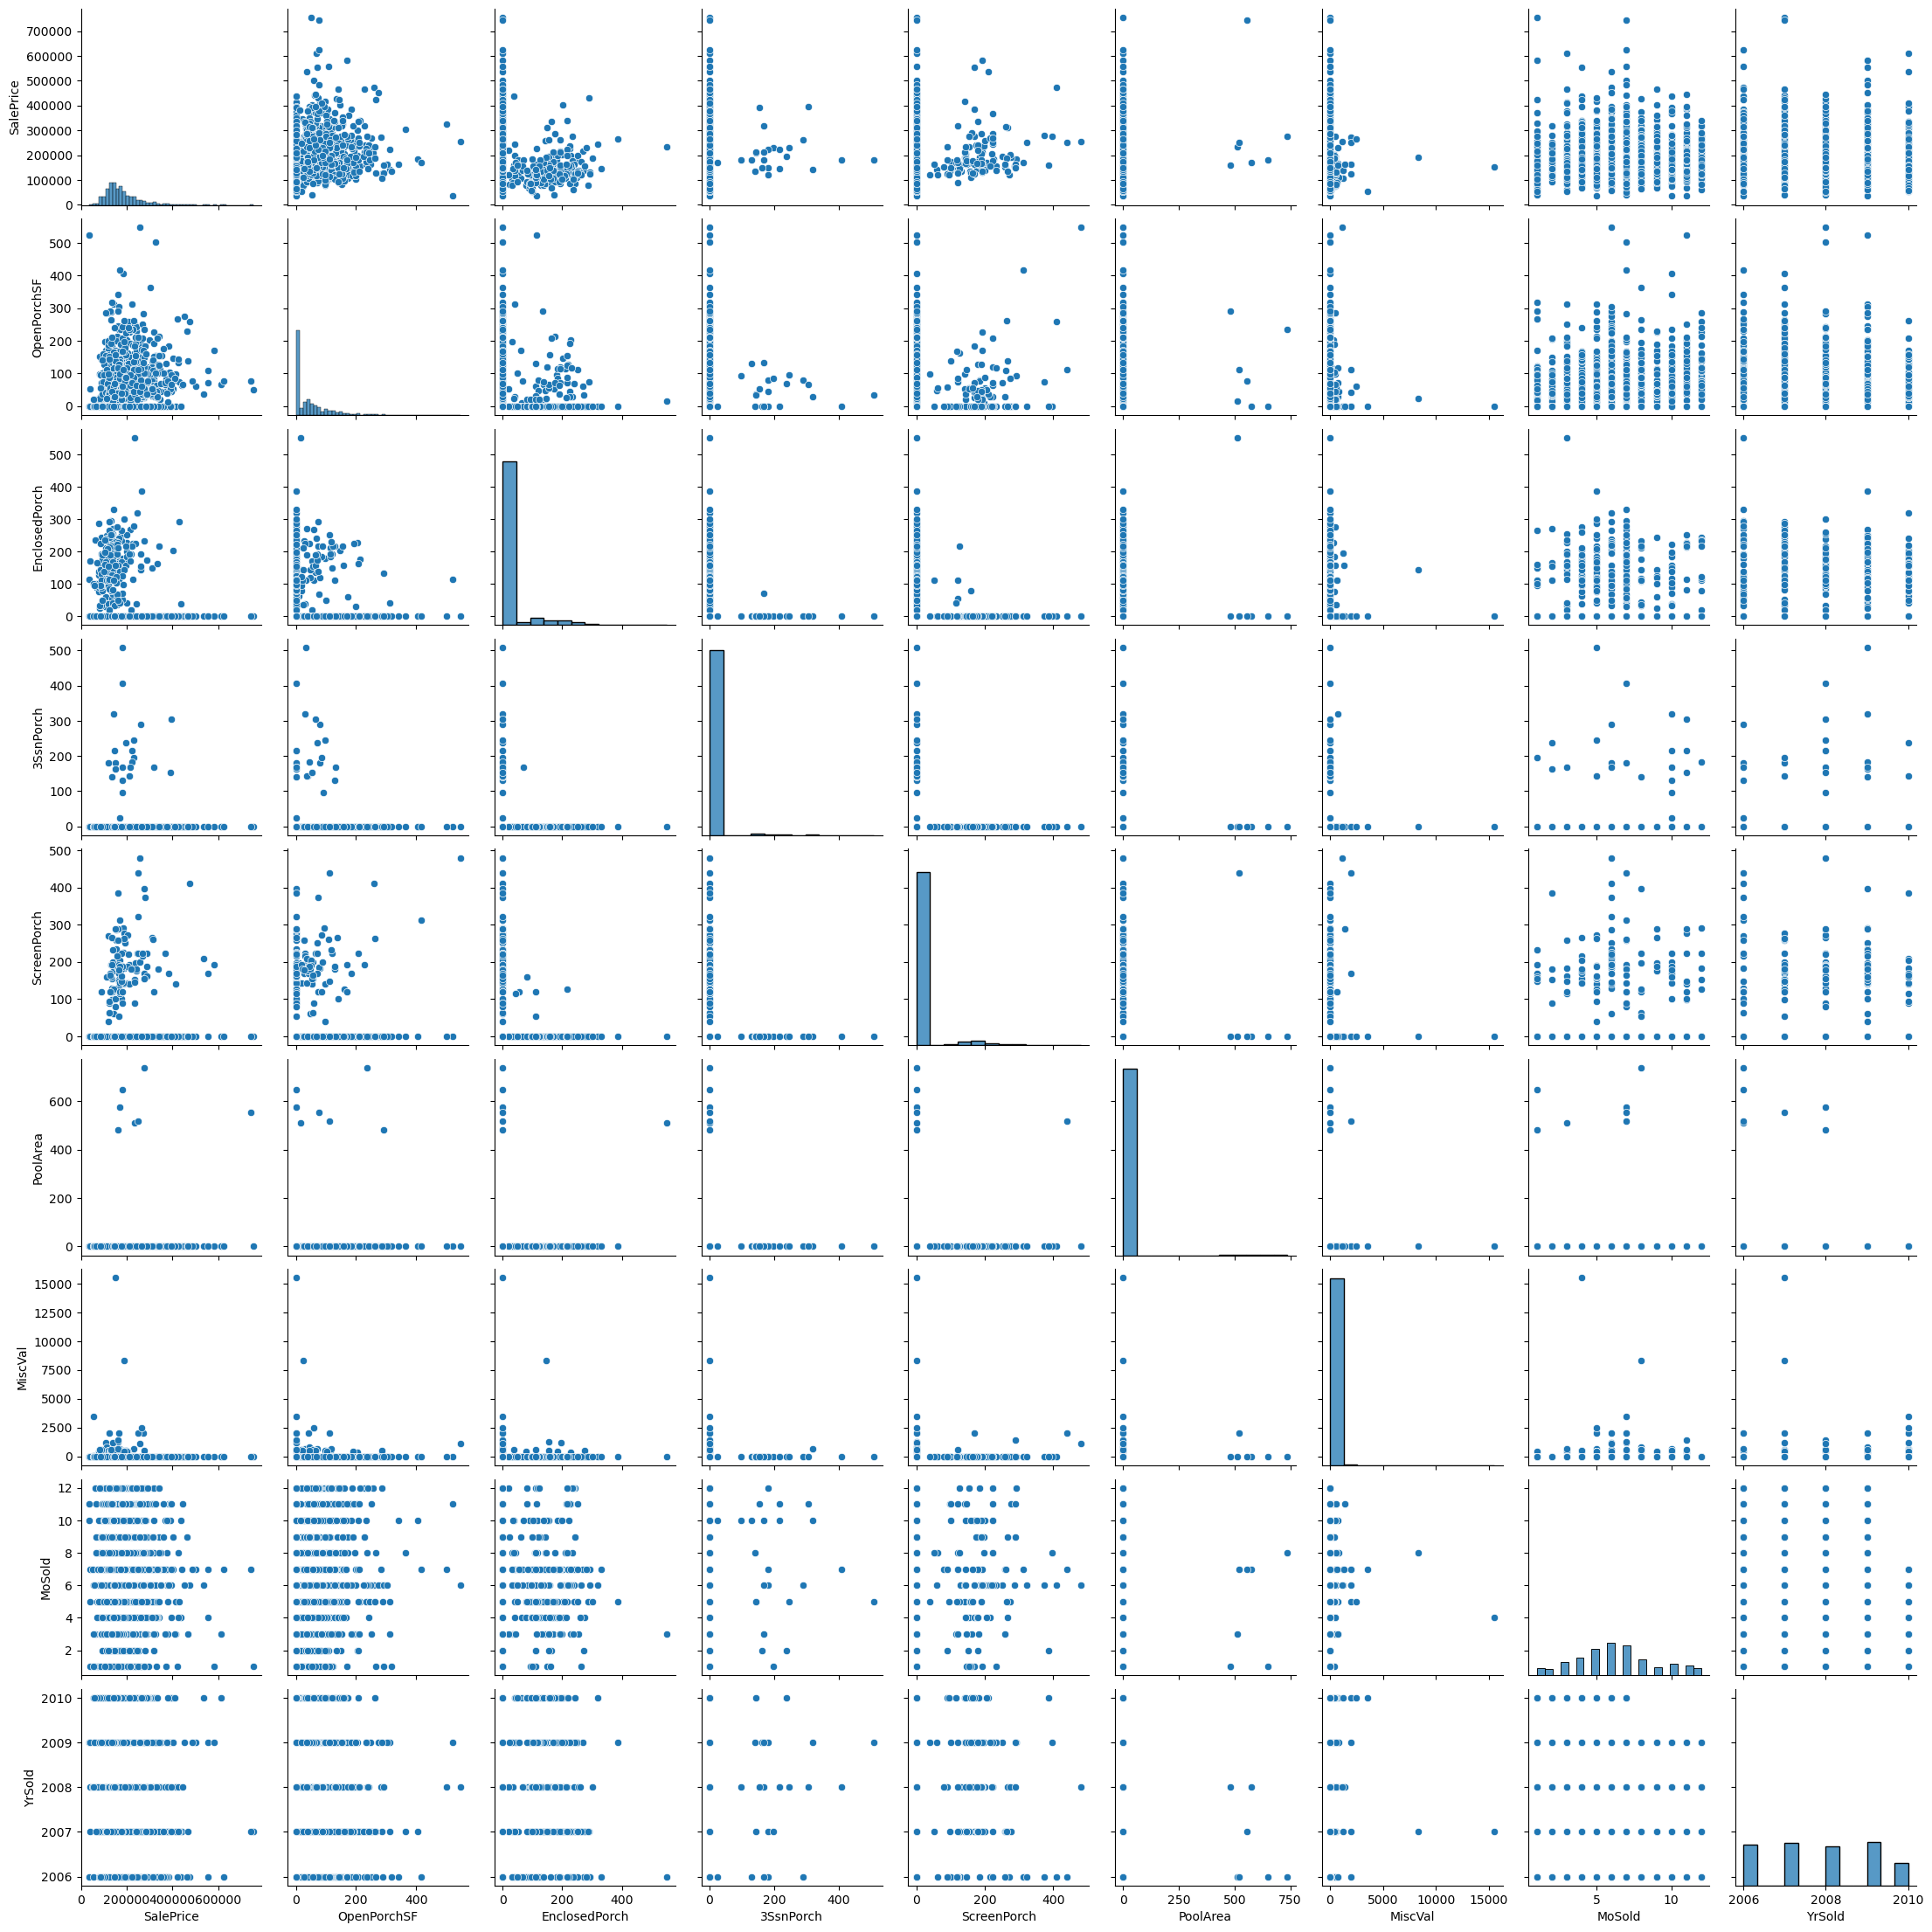

In [20]:
num_var1=['SalePrice', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']
        
df_num=df[num_var1]
sns.pairplot(df_num)
plt.show()

<h3><font color="red"> Since some Independent variables are positively correlated with SalesPrice -
We should go ahead with Linear Correlation <br /><br /><br /> <font color="green"> 
Assumption 1 passed since some Linear Relationship is observed between Independent and Target Variable  </h3>

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x="OverallQual",y="SalePrice",data=df)

In [ ]:
fig,ax = plt.subplots(figsize=(17,14))         # Sample figsize in inches
sns.heatmap(df.corr(),annot=True, linewidths=.4, ax=ax)